In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\Aaditya\Desktop\Intellipaat\Jupyter_Notebook_Directory\dataset\Cricket.csv",encoding="latin1")

In [3]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [4]:
df.shape

(79, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [6]:
df.describe()

,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,0
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,245.075949,230.544304,30.037975,7618.139241,38.523291,9684.455696,79.295316,11.556962,46.443038,13.253165
std,74.211716,70.321022,14.421710,2551.873313,5.919093,3193.835825,9.925307,8.092014,16.351701,5.925755
min,128.000000,127.000000,4.000000,5080.000000,23.570000,5504.000000,60.570000,0.000000,23.000000,3.000000
25%,188.000000,177.000000,17.500000,5759.000000,34.600000,7393.500000,73.725000,6.000000,34.500000,9.000000
50%,232.000000,217.000000,29.000000,6798.000000,37.870000,9134.000000,77.730000,10.000000,42.000000,13.000000
75%,281.500000,261.500000,40.000000,8739.500000,41.845000,10976.000000,85.180000,15.500000,54.000000,16.000000
max,463.000000,452.000000,70.000000,18426.000000,53.940000,21367.000000,117.000000,49.000000,96.000000,34.000000


In [7]:
df.isnull().sum()

Player    0
Span      0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave       0
BF        0
SR        0
100       0
50        0
0         0
dtype: int64

In [8]:
# to convert the span into years of experience
# we first split the span into start and end and store in new column

df[['Strt','End']] = df.Span.str.split("-",expand=True) 

In [9]:
# convert them as int and
# find years of exp as end year - start year
# later drop the unneceassry columns such as start, end and span
# we are only left with the experience column now

df[['Strt','End']]=df[['Strt','End']].astype(int)
df['Exp']=df['End']-df['Strt']
df=df.drop(['Strt','End','Span'], axis = 1) 
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

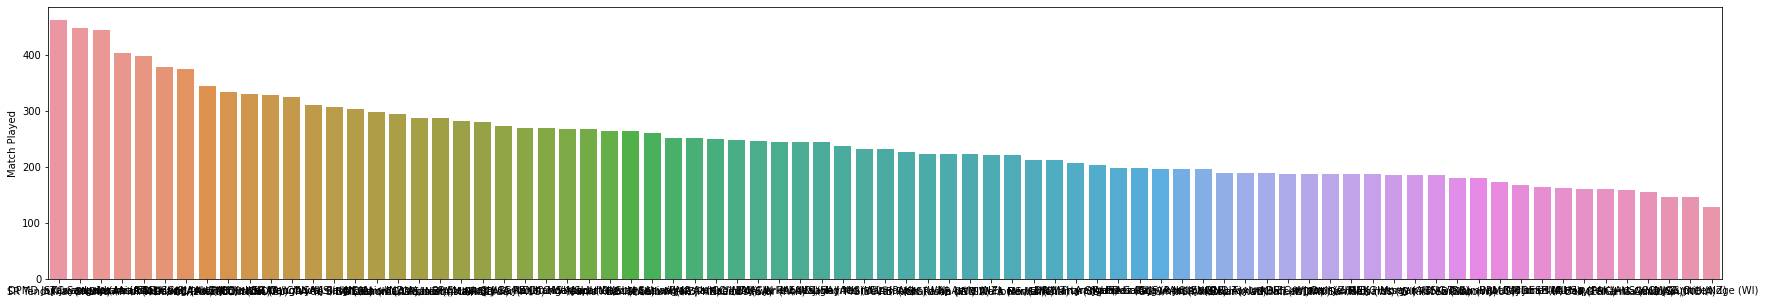

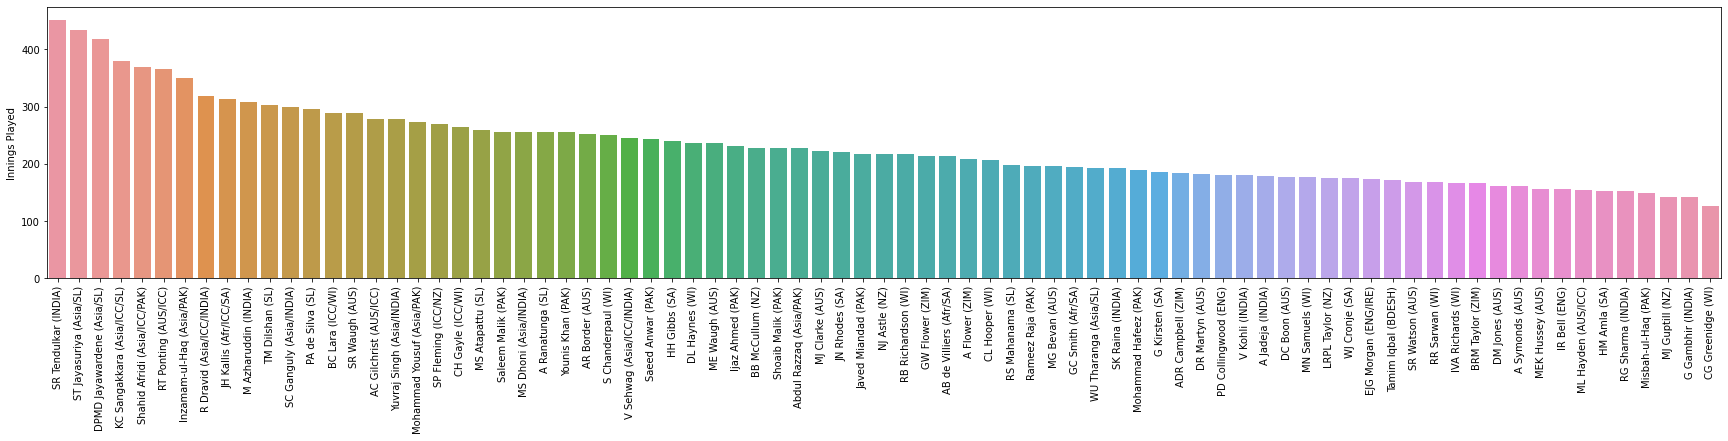

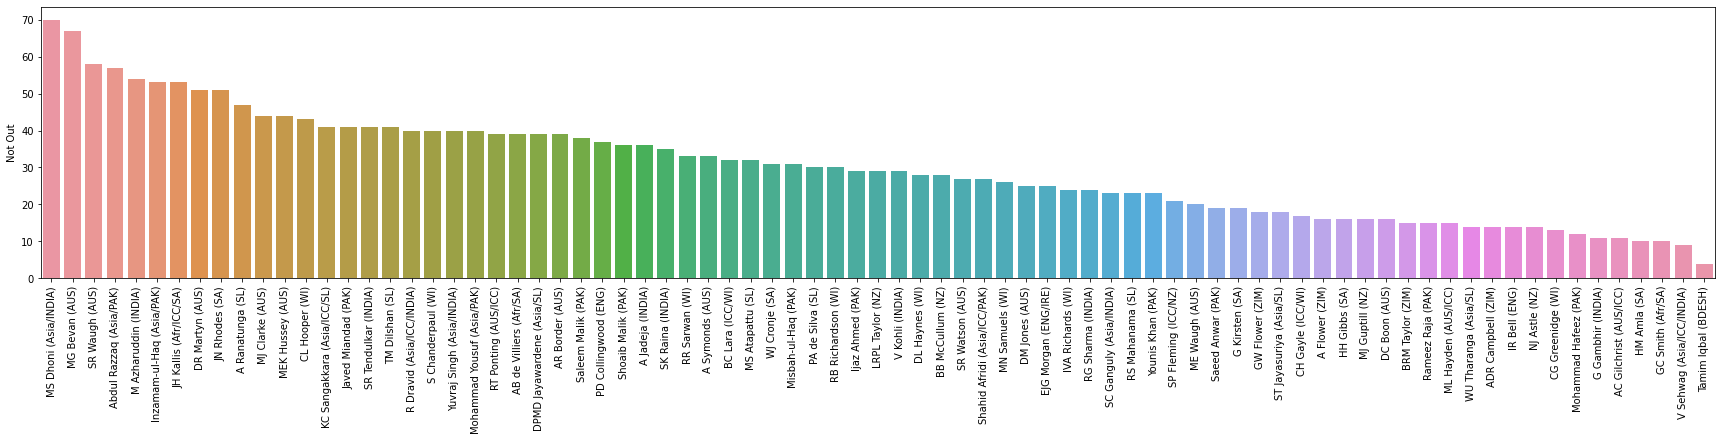

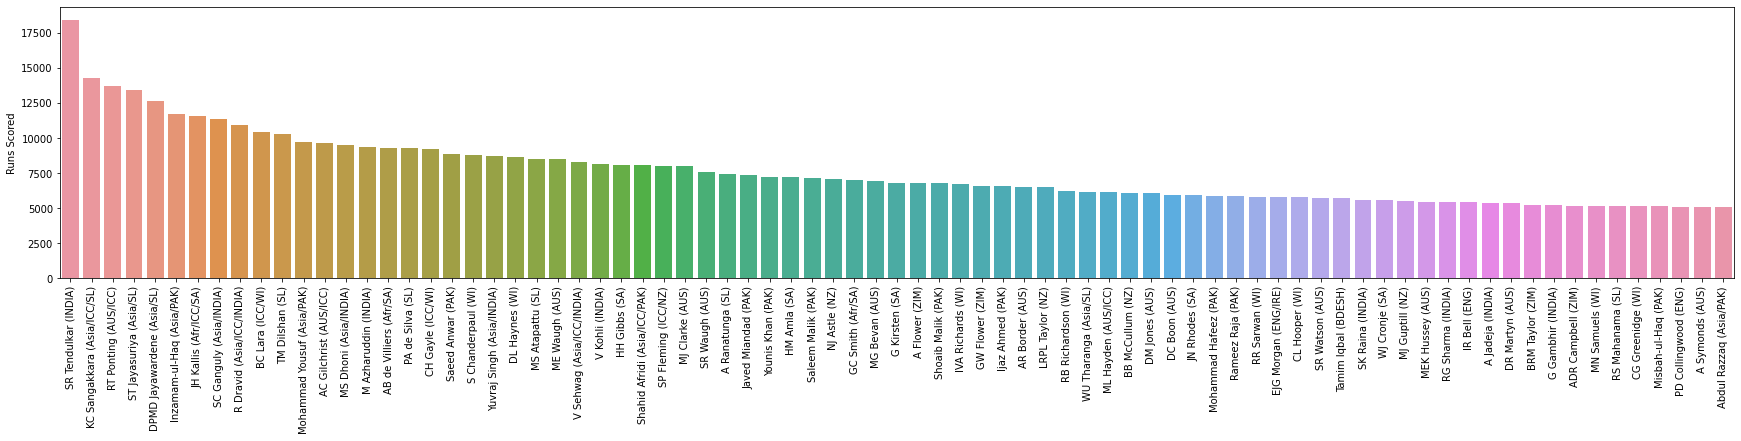

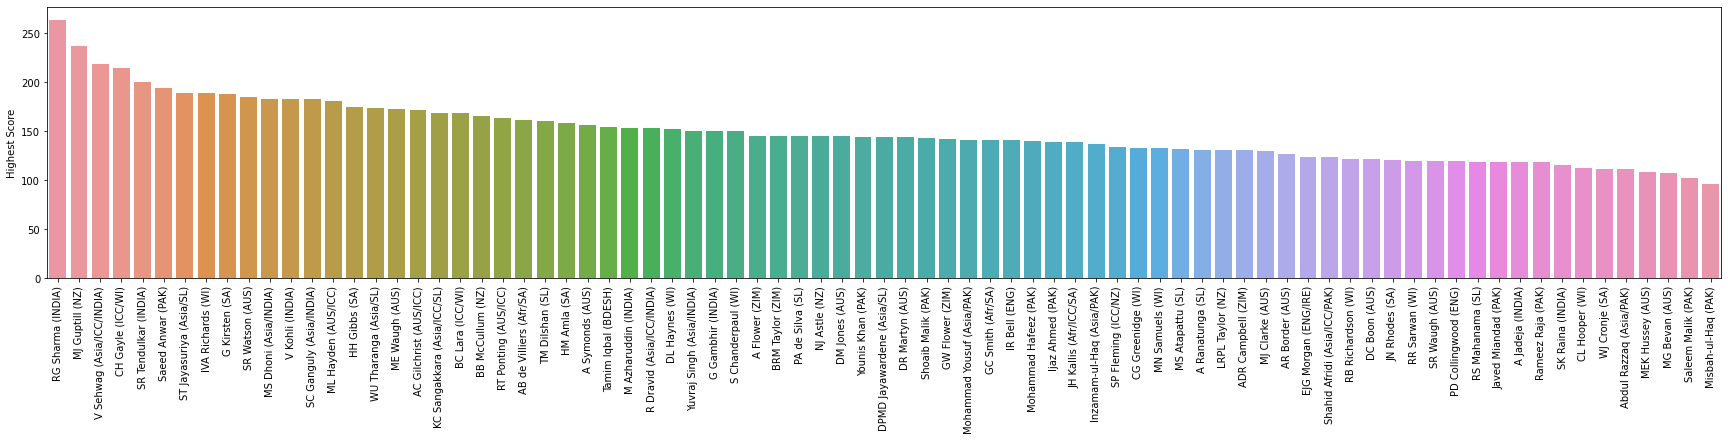

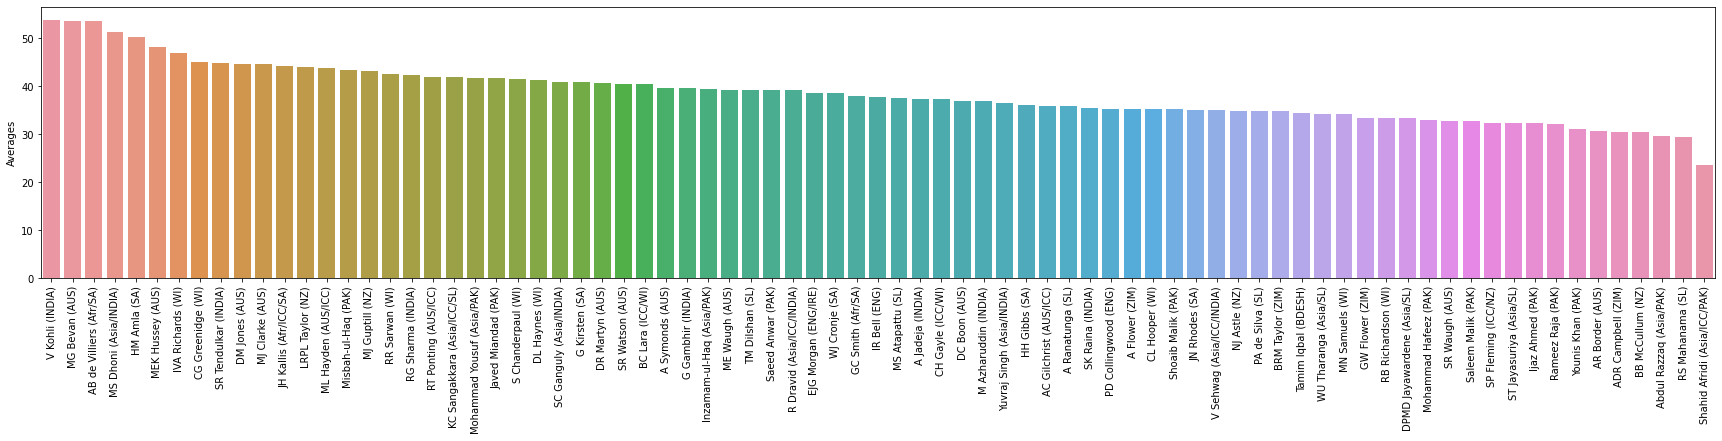

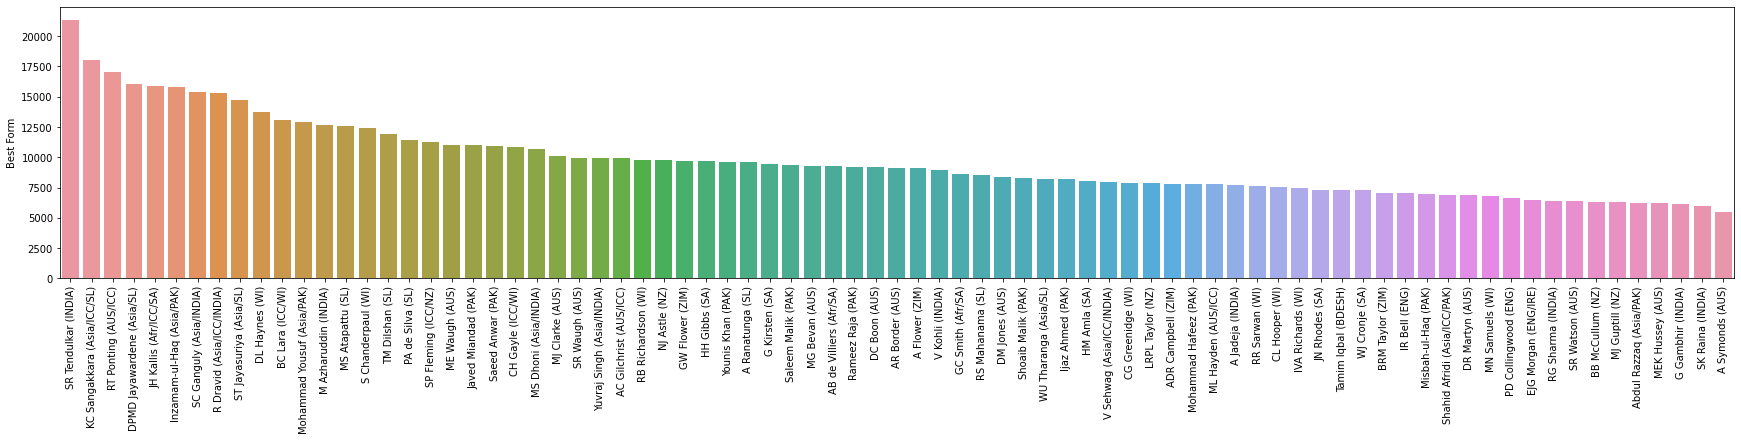

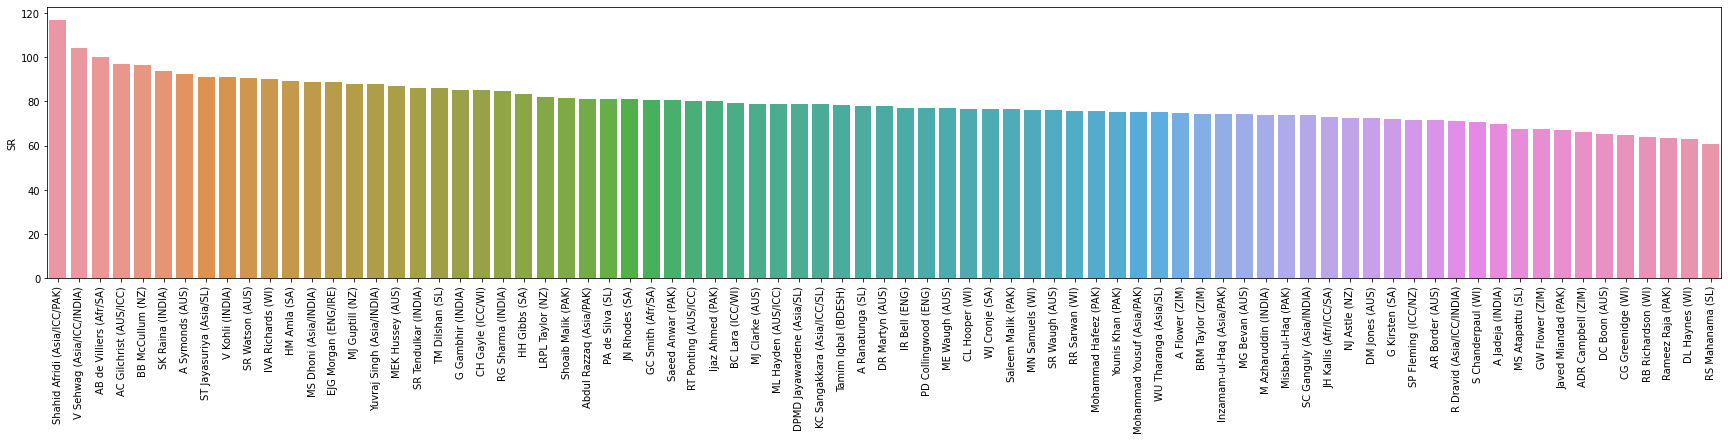

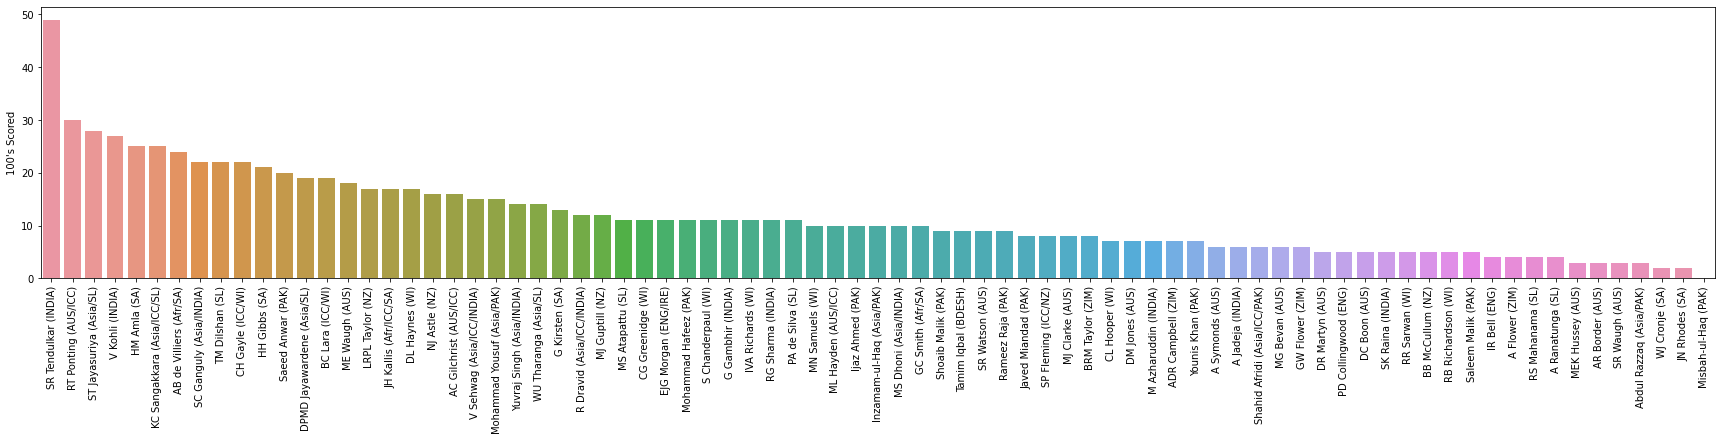

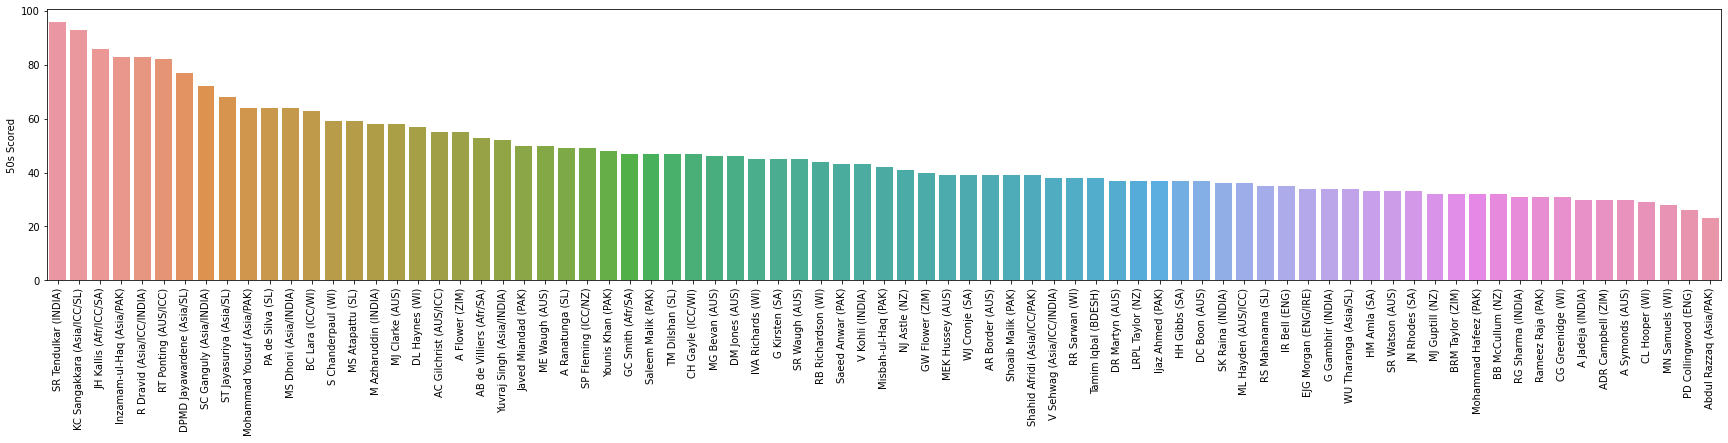

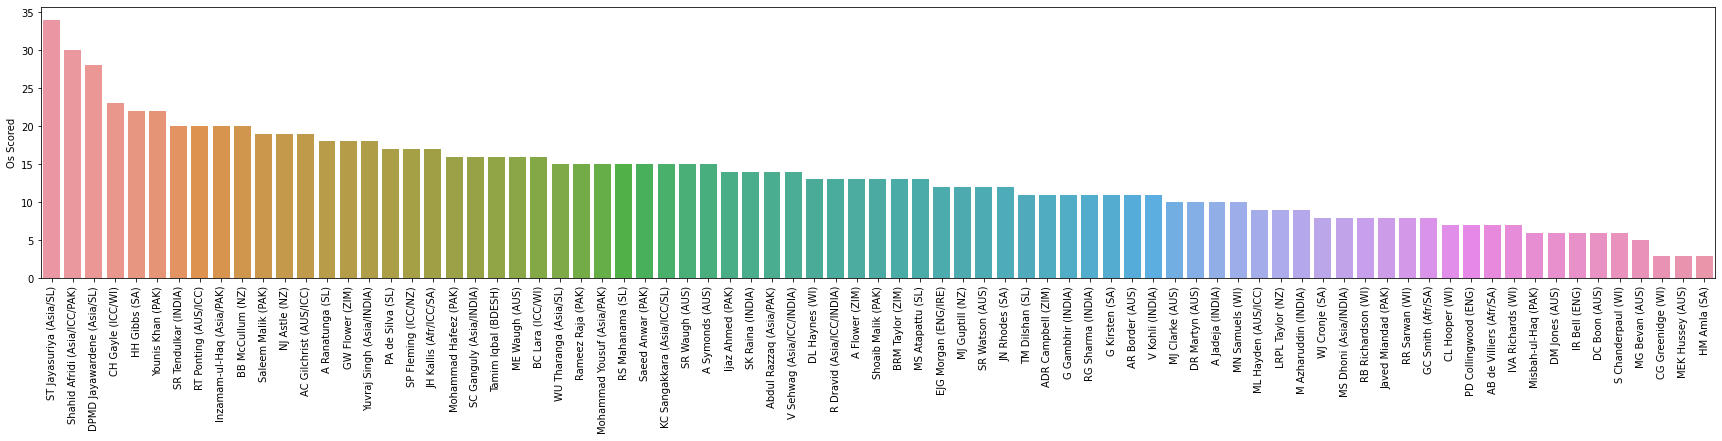

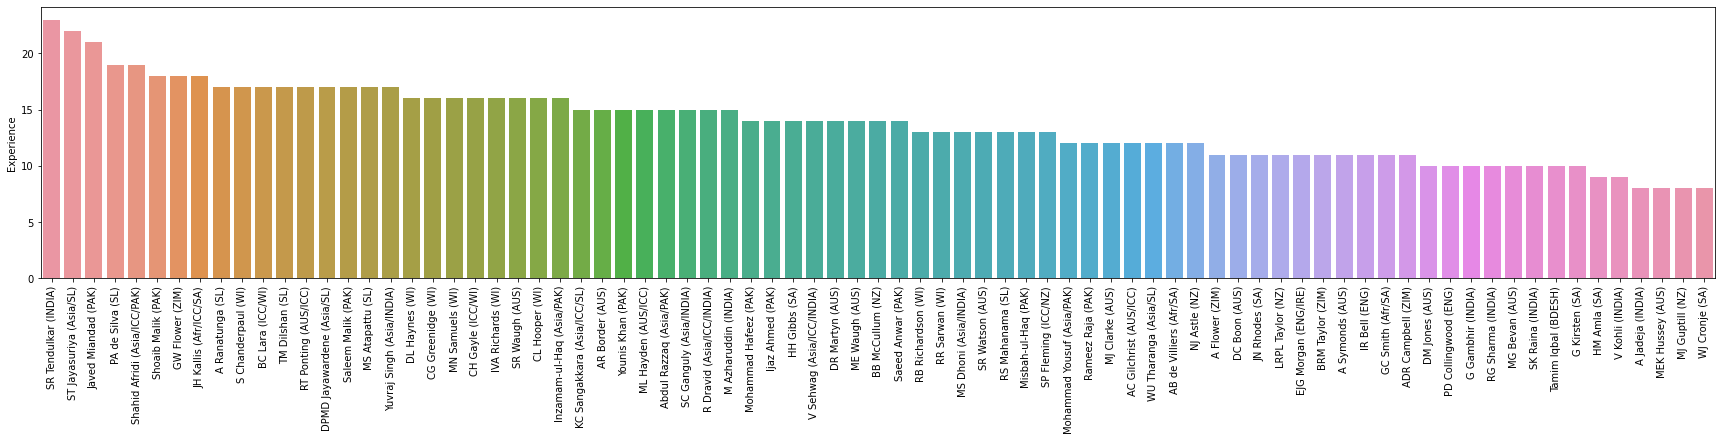

In [11]:
# defining no.of subplots we want
#plt.subplot(1, 1, 1)
#Match Played

plt.figure(figsize = (30,5))
mat = df[['Player','Mat']].sort_values('Mat', ascending = False)
ax = sns.barplot(x='Player', y='Mat', data= mat)
ax.set(xlabel = '', ylabel= 'Match Played')
plt.show()


#Inns
#plt.subplot(1, 2, 2)
plt.figure(figsize = (30,5))
inns = df[['Player','Inns']].sort_values('Inns', ascending = False)
ax = sns.barplot(x='Player', y='Inns', data= inns)
ax.set(xlabel = '', ylabel= 'Innings Played')
plt.xticks(rotation=90)
plt.show()

#NO
#plt.subplot(1, 3, 3)
plt.figure(figsize = (30,5))
no = df[['Player','NO']].sort_values('NO', ascending = False)
ax = sns.barplot(x='Player', y='NO', data= no)
ax.set(xlabel = '', ylabel= 'Not Out')
plt.xticks(rotation=90)
plt.show()

#Runs
#plt.subplot(2, 1, 1)
plt.figure(figsize = (30,5))
run = df[['Player','Runs']].sort_values('Runs', ascending = False)
ax = sns.barplot(x='Player', y='Runs', data= run)
ax.set(xlabel = '', ylabel= 'Runs Scored')
plt.xticks(rotation=90)
plt.show()

#HS
#plt.subplot(2, 2, 2)
df.HS=df.HS.str.extract('(\d+)')
df.HS=df.HS.astype(int)
plt.figure(figsize = (30,5))
hs = df[['Player','HS']].sort_values('HS', ascending = False)
ax = sns.barplot(x='Player', y='HS', data= hs)
ax.set(xlabel = '', ylabel= 'Highest Score')
plt.xticks(rotation=90)
plt.show()

#Ave
#plt.subplot(2, 3, 3)
plt.figure(figsize = (30,5))
ave = df[['Player','Ave']].sort_values('Ave', ascending = False)
ax = sns.barplot(x='Player', y='Ave', data= ave)
ax.set(xlabel = '', ylabel= 'Averages')
plt.xticks(rotation=90)
plt.show()

#BF
#plt.subplot(3, 1, 1)
plt.figure(figsize = (30,5))
bf = df[['Player','BF']].sort_values('BF', ascending = False)
ax = sns.barplot(x='Player', y='BF', data= bf)
ax.set(xlabel = '', ylabel= 'Best Form')
plt.xticks(rotation=90)
plt.show()

#SR 
#plt.subplot(3, 2, 2)
plt.figure(figsize = (30,5))
sr = df[['Player','SR']].sort_values('SR', ascending = False)
ax = sns.barplot(x='Player', y='SR', data= sr)
ax.set(xlabel = '', ylabel= 'SR')
plt.xticks(rotation=90)
plt.show()

#100
#plt.subplot(3, 3, 3)
plt.figure(figsize = (30,5))
r100 = df[['Player','100']].sort_values('100', ascending = False)
ax = sns.barplot(x='Player', y='100', data= r100)
ax.set(xlabel = '', ylabel= "100's Scored" )
plt.xticks(rotation=90)
plt.show()

#50
#plt.subplot(4, 1, 1)
plt.figure(figsize = (30,5))
r50 = df[['Player','50']].sort_values('50', ascending = False)
ax = sns.barplot(x='Player', y='50', data= r50)
ax.set(xlabel = '', ylabel= "50s Scored")
plt.xticks(rotation=90)
plt.show()

#0
#plt.subplot(4, 2, 2)
plt.figure(figsize = (30,5))
r0 = df[['Player','0']].sort_values('0', ascending = False)
ax = sns.barplot(x='Player', y='0', data= r0)
ax.set(xlabel = '', ylabel= "Os Scored")
plt.xticks(rotation=90)
plt.show()

#Exp
#plt.subplot(4, 3, 3)
plt.figure(figsize = (30,5))
exp = df[['Player','Exp']].sort_values('Exp', ascending = False)
ax = sns.barplot(x='Player', y='Exp', data= exp)
ax.set(xlabel = '', ylabel= 'Experience')
plt.xticks(rotation=90)
plt.show()



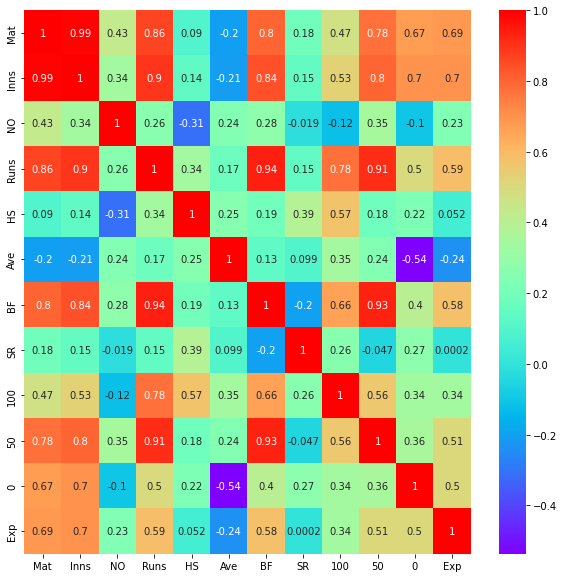

In [12]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True, cmap="rainbow")
plt.savefig('Correlation')
plt.show()

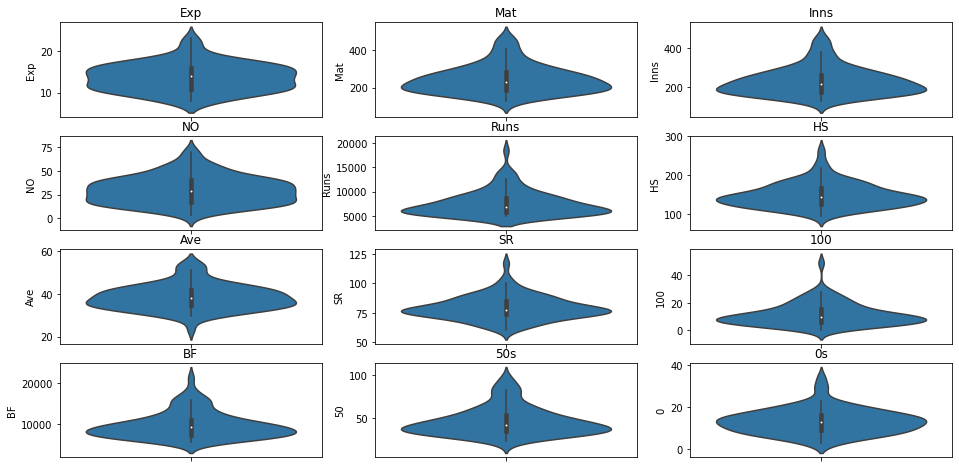

In [13]:
#Removing outliers
f, axes = plt.subplots(4,3, figsize=(16, 8))
s=sns.violinplot(y=df.Exp,ax=axes[0, 0])
axes[0, 0].set_title('Exp')
s=sns.violinplot(y=df.Mat,ax=axes[0, 1])
axes[0, 1].set_title('Mat')
s=sns.violinplot(y=df.Inns,ax=axes[0, 2])
axes[0, 2].set_title('Inns')

s=sns.violinplot(y=df.NO,ax=axes[1, 0])
axes[1, 0].set_title('NO')
s=sns.violinplot(y=df.Runs,ax=axes[1, 1])
axes[1, 1].set_title('Runs')
s=sns.violinplot(y=df.HS,ax=axes[1, 2])
axes[1, 2].set_title('HS')

s=sns.violinplot(y=df.Ave,ax=axes[2, 0])
axes[2, 0].set_title('Ave')
s=sns.violinplot(y=df.SR,ax=axes[2, 1])
axes[2, 1].set_title('SR')
s=sns.violinplot(y=df['100'],ax=axes[2, 2])
axes[2, 2].set_title('100')
s=sns.violinplot(y=df.BF,ax=axes[3, 0])
axes[3, 0].set_title('BF')
s=sns.violinplot(y=df['50'],ax=axes[3, 1])
axes[3, 1].set_title('50s')
s=sns.violinplot(y=df['0'],ax=axes[3, 2])
axes[3, 2].set_title('0s')
plt.show()

In [14]:
df_drop=df.copy()
player=df_drop.pop("Player")

In [15]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mat     79 non-null     int64  
 1   Inns    79 non-null     int64  
 2   NO      79 non-null     int64  
 3   Runs    79 non-null     int64  
 4   HS      79 non-null     int32  
 5   Ave     79 non-null     float64
 6   BF      79 non-null     int64  
 7   SR      79 non-null     float64
 8   100     79 non-null     int64  
 9   50      79 non-null     int64  
 10  0       79 non-null     int64  
 11  Exp     79 non-null     int32  
dtypes: float64(2), int32(2), int64(8)
memory usage: 6.9 KB


In [16]:
df_drop.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
